## RL Circuit

### We have connected an inductor in a circuit with a resistor as shown below:

<img src="RLcir.jpg">

### Solution using numerical method

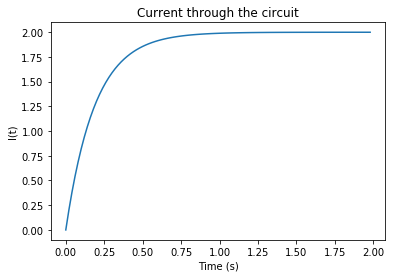

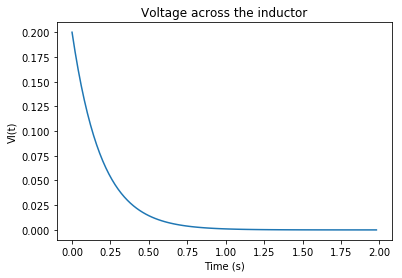

In [3]:
import numpy as np
import matplotlib.pyplot as plt

R = 5.0
L = 1.0
Vb = 10

nx =100
t = np.arange(0,2,0.02)
delta = 0.02

Vl = np.zeros(len(t))
I = np.zeros(len(t))
#Vc[0] = 0
for i in range(1,len(Vl)):
    
    I[i] = I[i-1] + delta * ((-I[i-1] * R)/L + Vb/L)
    Vl[i-1] = L * (I[i] - I[i-1])



plt.plot(t,I)
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('Current through the circuit')
plt.show()

plt.plot(t,Vl)
plt.xlabel('Time (s)')
plt.ylabel('Vl(t)')
plt.title('Voltage across the inductor')
plt.show()



### Using FFT

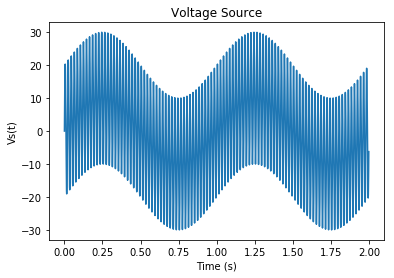

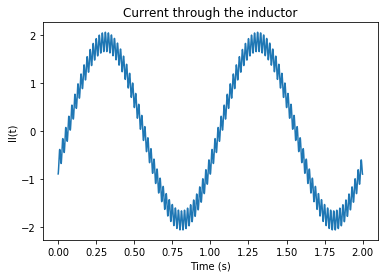

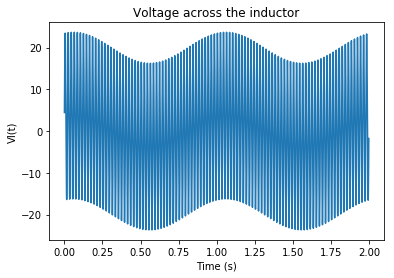

In [4]:
from numpy.fft import fft
from numpy.fft import ifft


R = 5.0
L = 1.0

t = np.arange(0,2,0.001)
Vs = 10*np.sin(2*np.pi*1*t) + 20* np.sin(2*np.pi*50*t)
N = len(Vs)
w = np.ones(N)
w[0:N/2 +1]= np.array([np.arange(0,N/2 +1)])
w[N/2+1 : N] = np.arange(-(N/2 -1),0)
Il = ifft(fft(Vs)/(R+1j*w*L))
Vl = ifft(L * 1j * w * fft(Il))

# only phase and magnitude changes
plt.plot(t,Vs)
plt.xlabel('Time (s)')
plt.ylabel('Vs(t)')
plt.title('Voltage Source')
plt.show()

plt.plot(t,np.real(Il))
plt.xlabel('Time (s)')
plt.ylabel('Il(t)')
plt.title('Current through the inductor')
plt.show()


plt.plot(t,np.real(Vl))
plt.xlabel('Time (s)')
plt.ylabel('Vl(t)')
plt.title('Voltage across the inductor')
plt.show()
